In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fftpack
import os

In [18]:
# for root, dirs, files in os.walk("../new_data_processing/gradients_with_relax_data/"):
#     for i, filename in enumerate(files):
#         print(filename)
#         data_frame=pd.read_csv(root + "/" + filename, header=None)
#         df1 = data_frame.loc[:,:38]
# #         lbls = data_frame.loc[:,39]
#         plt.figure(num=1, figsize=(16, 8))
#         plt.plot(df1, color='g')
#         plt.show()
        
        
#         df1=(df1-df1.mean())/df1.std()+0.000001 #(df1.max() - df1.min())
#         x_train, x_test, y_train, y_test = train_test_split(df1, lbls, test_size=0.2, random_state=42)
# #         labels = ['H','S']
#         svm = SVC()
#         svm.fit(x_train, y_train)
#         y_pred=svm.predict(x_test)
#         score = accuracy_score(y_test, y_pred)
# #         print('SVM score: ' + str(score))
        
#         scores = []
#         for i in range(20):
#             clf = MLPClassifier(activation='relu', hidden_layer_sizes=(20,20), max_iter=200000, learning_rate='adaptive', early_stopping=False)
#             clf.fit(x_train, y_train)
#             y_pred=clf.predict(x_test)
#             score = accuracy_score(y_test, y_pred)
#             scores.append(score)
#         print('NN score: ' + str(np.max(np.array(scores))))
        
#         print('\n-----------------\n')

In [38]:
data_frame=pd.read_csv("../new_data_processing/gradients_with_relax_data/all.csv", header=None)
relax_avg = data_frame.loc[:,:38]

In [41]:
data_frame2=pd.read_csv("../new_data_processing/gradients_with_relax_data/all.csv", header=None)
other_avg = data_frame2.loc[:,:38]

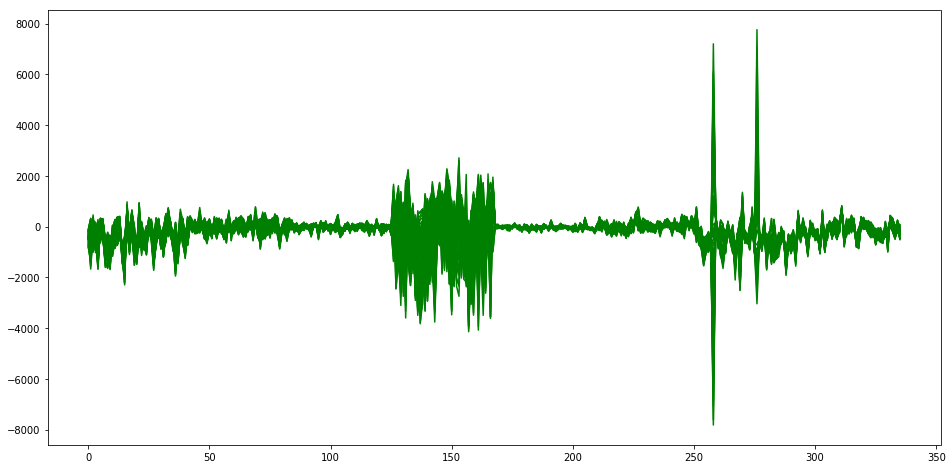

In [92]:
plt.figure(num=1, figsize=(16, 8))
plt.plot(relax_avg, color='g', label='relax grad')
# plt.plot(other_avg, color='b', label='action grad')
# plt.legend()
plt.show()

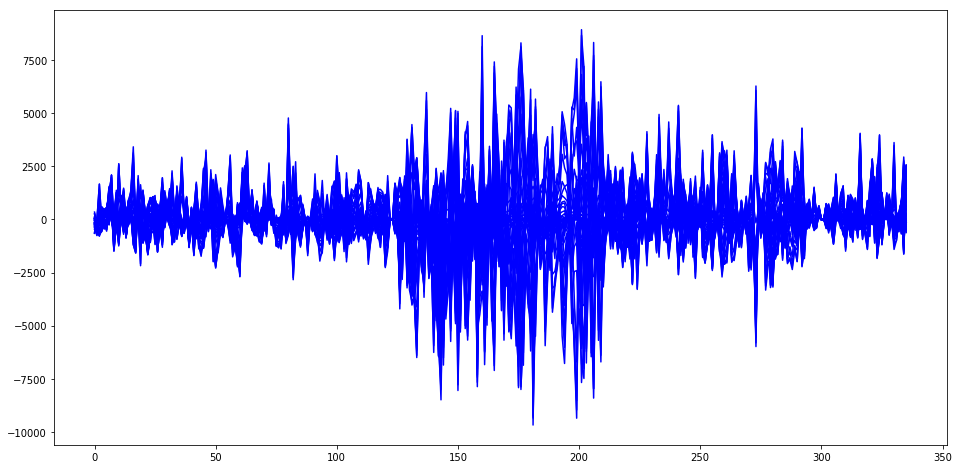

In [93]:
plt.figure(num=1, figsize=(16, 8))
# plt.plot(relax_avg, color='g', label='relax grad')
plt.plot(other_avg, color='b', label='action grad')
# plt.legend()
plt.show()

In [71]:
r_plus_m = []
r_minus_m = []
for i in range(336):
    j = np.array(relax_avg.iloc[i, :])
    if len(j[j>0]):
       r_plus_m.append(np.median(j[j>0])) 
    if len(j[j<0]):
        r_minus_m.append(np.median(j[j<0]))

In [88]:
a = np.mean(np.array(r_plus_m))
b = np.mean(np.array(r_minus_m))
print(a)
print(b)

236.983148148
-369.926060606


In [89]:
all_plus_m = []
all_minus_m = []
for i in range(336):
    j = np.array(other_avg.iloc[i, :])
    if len(j[j>0]):
       all_plus_m.append(np.median(j[j>0])) 
    if len(j[j<0]):
        all_minus_m.append(np.median(j[j<0]))

In [90]:
c = np.mean(np.array(all_plus_m))
d = np.mean(np.array(all_minus_m))

print(c)
print(d)

764.056437126
-686.405105105


236.983148148
-369.926060606
764.056437126
-686.405105105


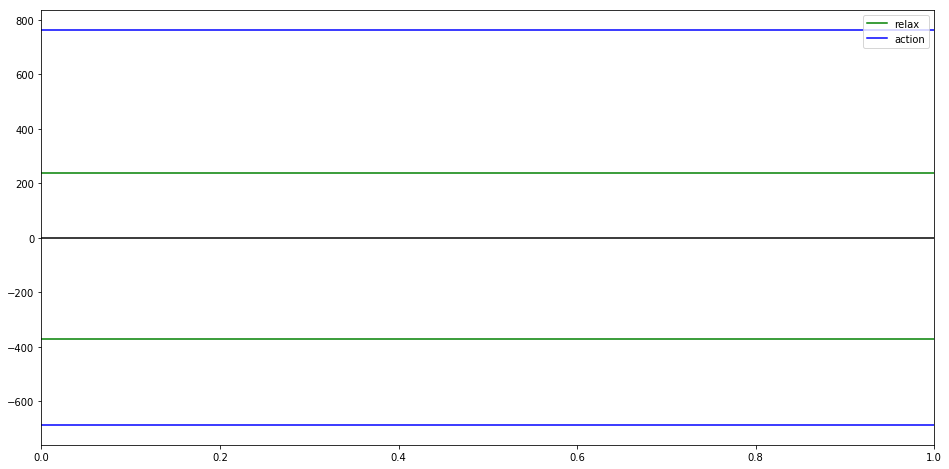

In [91]:
print(a)
print(b)
print(c)
print(d)

plt.figure(num=1, figsize=(16, 8))
plt.axhline(a, color='g', label='relax')
plt.axhline(b, color='g')
plt.axhline(c, color='b', label='action')
plt.axhline(d, color='b')
plt.axhline(0, color='k')
plt.legend()
plt.show()

In [133]:
count = 0

for i in range(336):
    j = np.array(other_avg.iloc[i, :])
    j = j[j<0]
    if len(j) > 0:
        j = np.min(j)
        if j > -370:
            count = count + 1
            
print((336-count)/336)

0.8958333333333334


In [111]:
(0.663+.870)/2

0.7665